# **Challenge 5: Alaska Department of Snow Online Agent**

This solution document outlines the development of a cloud-based conversational agent (chatbot) for the Alaska Department of Snow (ADS) to help reduce high call volumes during snow events by addressing common public inquiries such as plowing schedules and school closures. The proposed solution includes a secure, cost-conscious architecture built on Google Cloud, leveraging Dialogflow CX and existing departmental data sources. It also addresses stakeholder concerns around cost, privacy, and AI reliability. A working prototype will be presented to demonstrate functionality, review system architecture, and support informed decision-making on potential adoption.

### **Solution Diagrams**


Architecture Diagram highlighting the different pieces of the solution
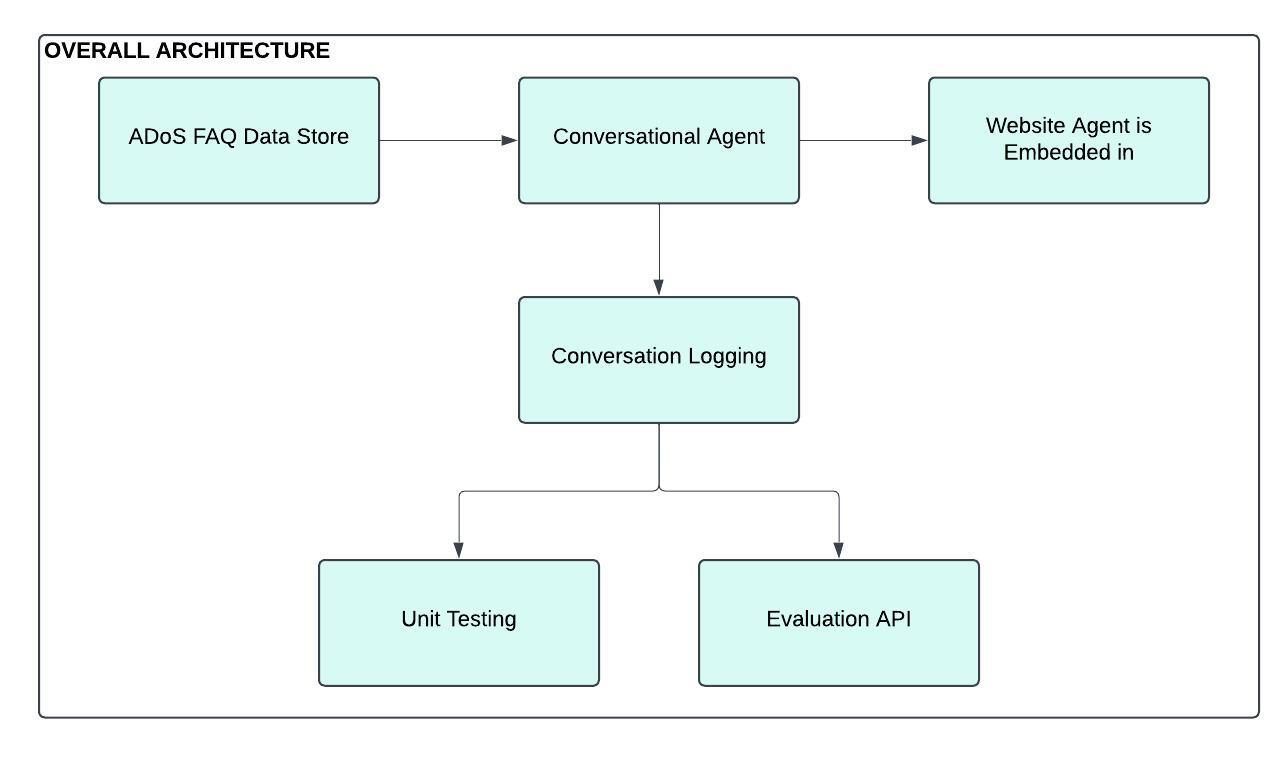

Conversation Workflow Diagram walking through the different steps and checkpoints of the Conversation Agent
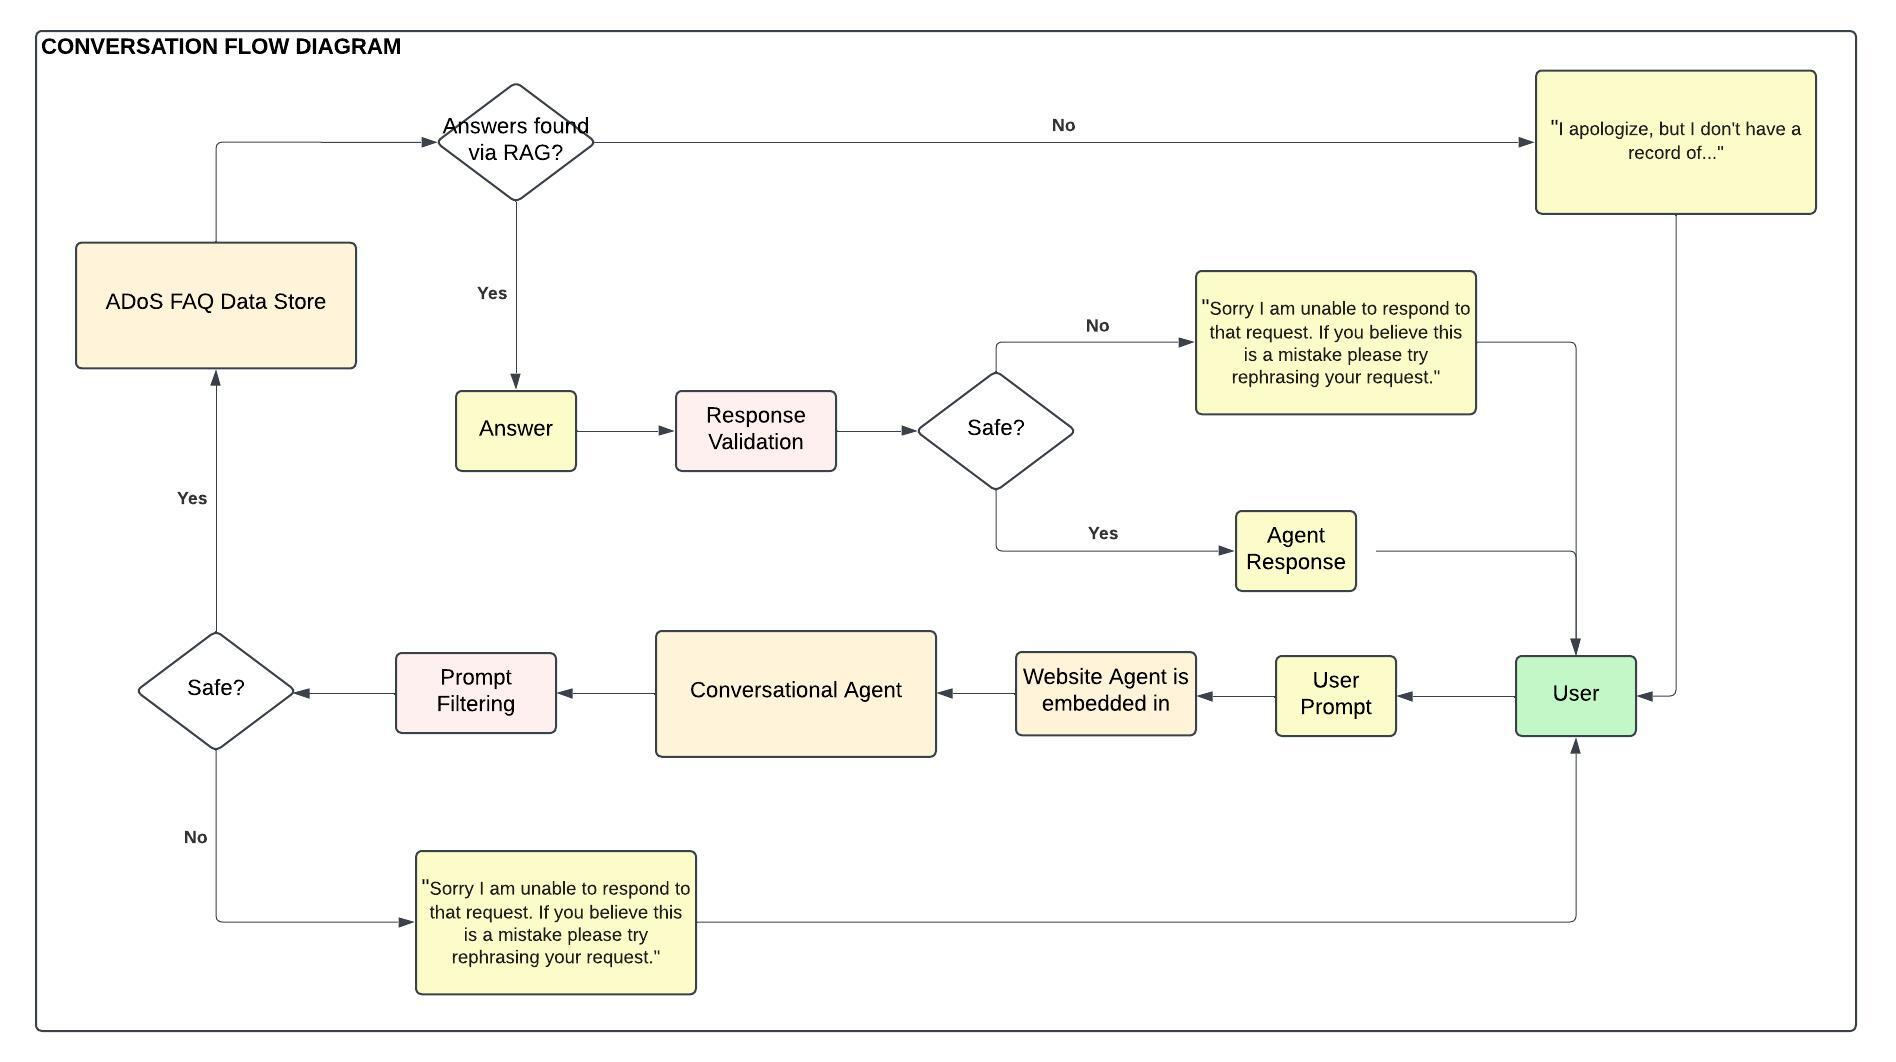

### **Conversational Agent**


The Conversational Agent has been exported into a zipped set of JSON files.

Included in the repository is also a screenshot of it embedded in a website as well as the html to run the website with the embedded Agent.


### **Prompt Filtering and Response Validation**


Security settings can be found inside of the extracted JSON of the Conversational Agent.



### **Conversation Logging**


All Conversations with the Agent are logged using the 'Conversation History' functionality. Logs can be reviewed and analyzed for further tweaking and quality assurance.

The log file of conversations can be found in the repository.



### **Implement RAG Grounding Evaluation**


Check grounding to determine how grounded a piece of text is in a given set of reference texts.

This test helps prove that the answers being returned were not hallucinated but did in fact stem from the provided FAQs.

Setting this up to run against a longer list of example questions and the returned responses would hypothetically help address any questions about accuracy of responses.

In [ ]:
#Intiate Environment Variables
project_id = "qwiklabs-gcp-00-711e7fbdb4c8"
location = "us-central1"
agent_id = "9812e48e-cd39-4265-997f-cf36373b4310"

In [ ]:
from google.cloud import discoveryengine_v1 as discoveryengine

client = discoveryengine.GroundedGenerationServiceClient()

# The full resource name of the grounding config.
# Format: projects/{project_id}/locations/{location}/groundingConfigs/default_grounding_config
grounding_config = client.grounding_config_path(
    project=project_id,
    location=location,
    grounding_config="default_grounding_config",
)

request = discoveryengine.CheckGroundingRequest(
    grounding_config=grounding_config,
    answer_candidate="<INSERT RETURNED ANSWER FROM CONVERSATIONAL AGENT>",
    facts=[
        discoveryengine.GroundingFact(
            fact_text=(
                "<INSERT FAQ FROM ASOD GCS BUCKET>"
            ),
            attributes={"<INSERT_ATTRIBUTE>": "FAQ DOCUMENT"},
        ),
        discoveryengine.GroundingFact(
            fact_text=(
                "<INSERT FAQ FROM ASOD GCS BUCKET>"
            ),
            attributes={"<INSERT_ATTRIBUTE>": "FAQ DOCUMENT"},
        ),
        discoveryengine.GroundingFact(
            fact_text=(
                "<INSERT FAQ FROM ASOD GCS BUCKET>"
            ),
            attributes={"<INSERT_ATTRIBUTE>": "FAQ DOCUMENT"},
        ),
        ...  # Add more facts as needed
    ],
    grounding_spec=discoveryengine.CheckGroundingSpec(citation_threshold=0.6),
)

response = client.check_grounding(request=request)

# Handle the response
print(response)

### **Unit Testing Run via Test Cases inside Conversational Agent**


Running Test Cases that passed would show that the agent was operating as expected when running into a few different scenarios.


*   Intended on-topic questions relating to Agent purpose and provided ASoD FAQs.
*   Off-topic non-problematic questions showing the Agent will only answer questions that pertain to its purpose.
*   Harmful/Dangerous/Problematic topics highlighting the in-house prompt filtering.
*   Malicious requests. Inputs attempting to break the agent and/or circumvent the current security features.



The included Test Cases can be found inside of the extracted JSON of the Conversational Agent.


Here is a screenshot of the Test Case interface inside the Conversational Agent interface. Unfortunately, I was not able to iron out how exactly to get it to fail or succeed. My best guess is it is due to my lack of understanding of proper 'Turn Level Expectations' and also possibly some missing permissions leading to the Test Runs not appearing to fully be accessing the data store how the actual agent does.



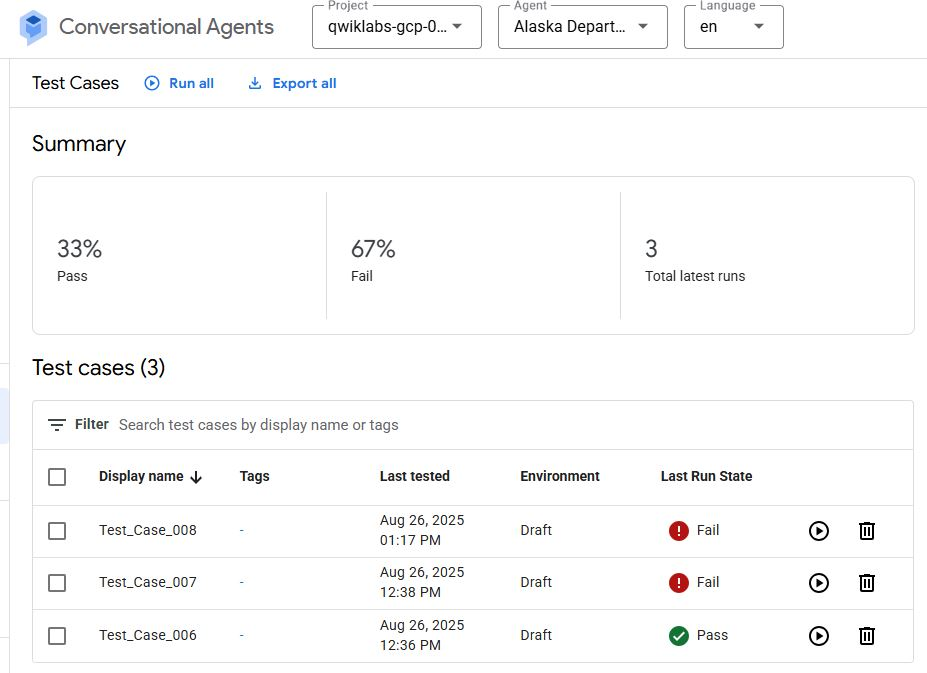
